In [1]:
%matplotlib notebook
import numpy as np
from scipy.stats import kde
from scipy.ndimage.filters import gaussian_filter
import pandas as pd
import os
import shutil
import subprocess
from subprocess import Popen
import datetime
import matplotlib.pyplot as plt  # plotting

from decimal import Decimal

from matplotlib.colors import LogNorm
from matplotlib.colors import SymLogNorm
from scipy.stats import binned_statistic_2d

# make prefix for figure filenames
now = datetime.datetime.now()
date = now.strftime('%Y%m%d')
pref = date

In [2]:
# working_dir = os.curdir
c = open(membranefile,'r')
c.readlines()

NameError: name 'membranefile' is not defined

In [3]:
aa=pd.read_table(membranefile, delim_whitespace=True)
len(aa.columns)
aa.columns=['object', 'contour', 'X', 'Y', 'Z']
aa=aa.set_index(['object', 'contour'])
aa

NameError: name 'membranefile' is not defined

In [4]:
#  read in text file
# for all txt filex

# for a particular txt file
actinfile1 = 'UnbranchedActinCoordinates_Integers.txt'
actinfile2 = 'BranchedActinCoordinates_Integers.txt'
membranefile = 'AllMembranesCoordinates.txt'

def read_text(file, label='fil'):
    
    import pandas as pd
    coordinatesfile = open(file, 'r')
    
    coords_df = pd.read_table(coordinatesfile, delim_whitespace=True)
#     check if there is an 'object' and 'contour' column (membrane)
    if len(coords_df.columns)==4:
        coords_df.columns=[label, 'X', 'Y', 'Z']
        coords_df=coords_df.set_index([label])
    
    elif len(coords_df.columns)==5:
        coords_df.columns=['object', label, 'X', 'Y', 'Z']
        coords_df=coords_df.set_index(['object', label])
        
    else:
        print("unexpected number of columns!")
#     make multiindex
    coordinatesfile.close()
    return coords_df

actin1 = read_text(actinfile1)
actin2 = read_text(actinfile2)
membrane = read_text(membranefile, 'contour')
membrane


X    Y    Z
object contour               
1      1        871  851  100
       1        891  863  100
       1        910  876  100
       1        926  880  100
       1        947  869  100
...             ...  ...  ...
12     42       896  201  113
       42       894  217  111
       42       884  239  108
       42       862  263  107
       42       843  290  104

[2452 rows x 3 columns]

# define which mebmrane surface to plot
## object == 1 is the CCP


In [5]:
all_membranes = membrane.reset_index()
CCP = all_membranes[all_membranes['object']==1]


<IPython.core.display.Javascript object>


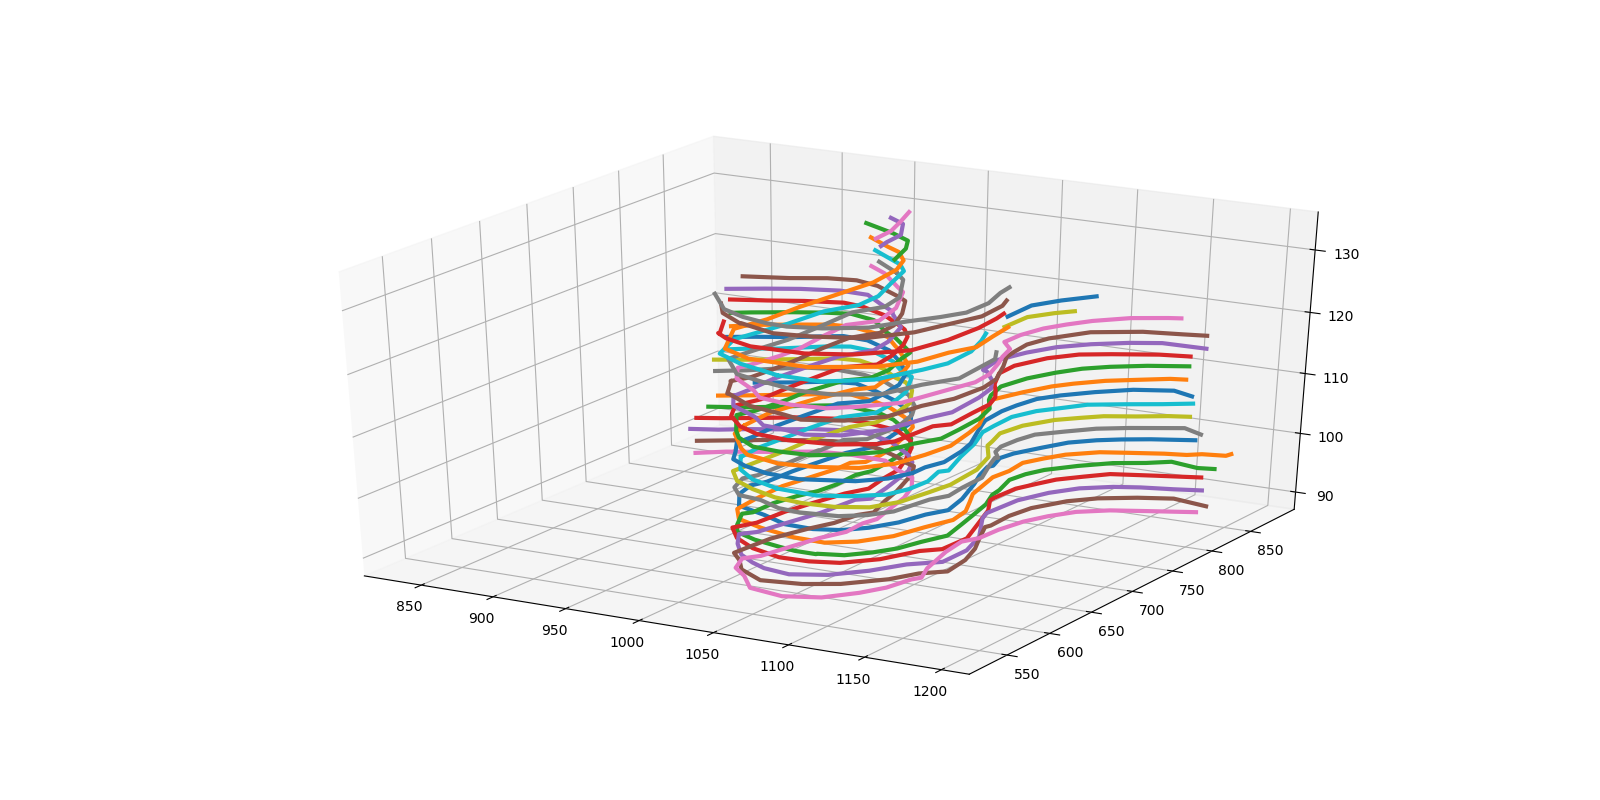

In [6]:
# plot membrane

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=[16,8])
ax=fig.add_subplot(111, projection='3d')

for contourr in CCP['contour'].unique():
    cur_contour = CCP[CCP['contour']==contourr]
    ax.plot(xs=cur_contour['X'], ys=cur_contour['Y'], zs=cur_contour['Z'], linewidth=3)

<IPython.core.display.Javascript object>


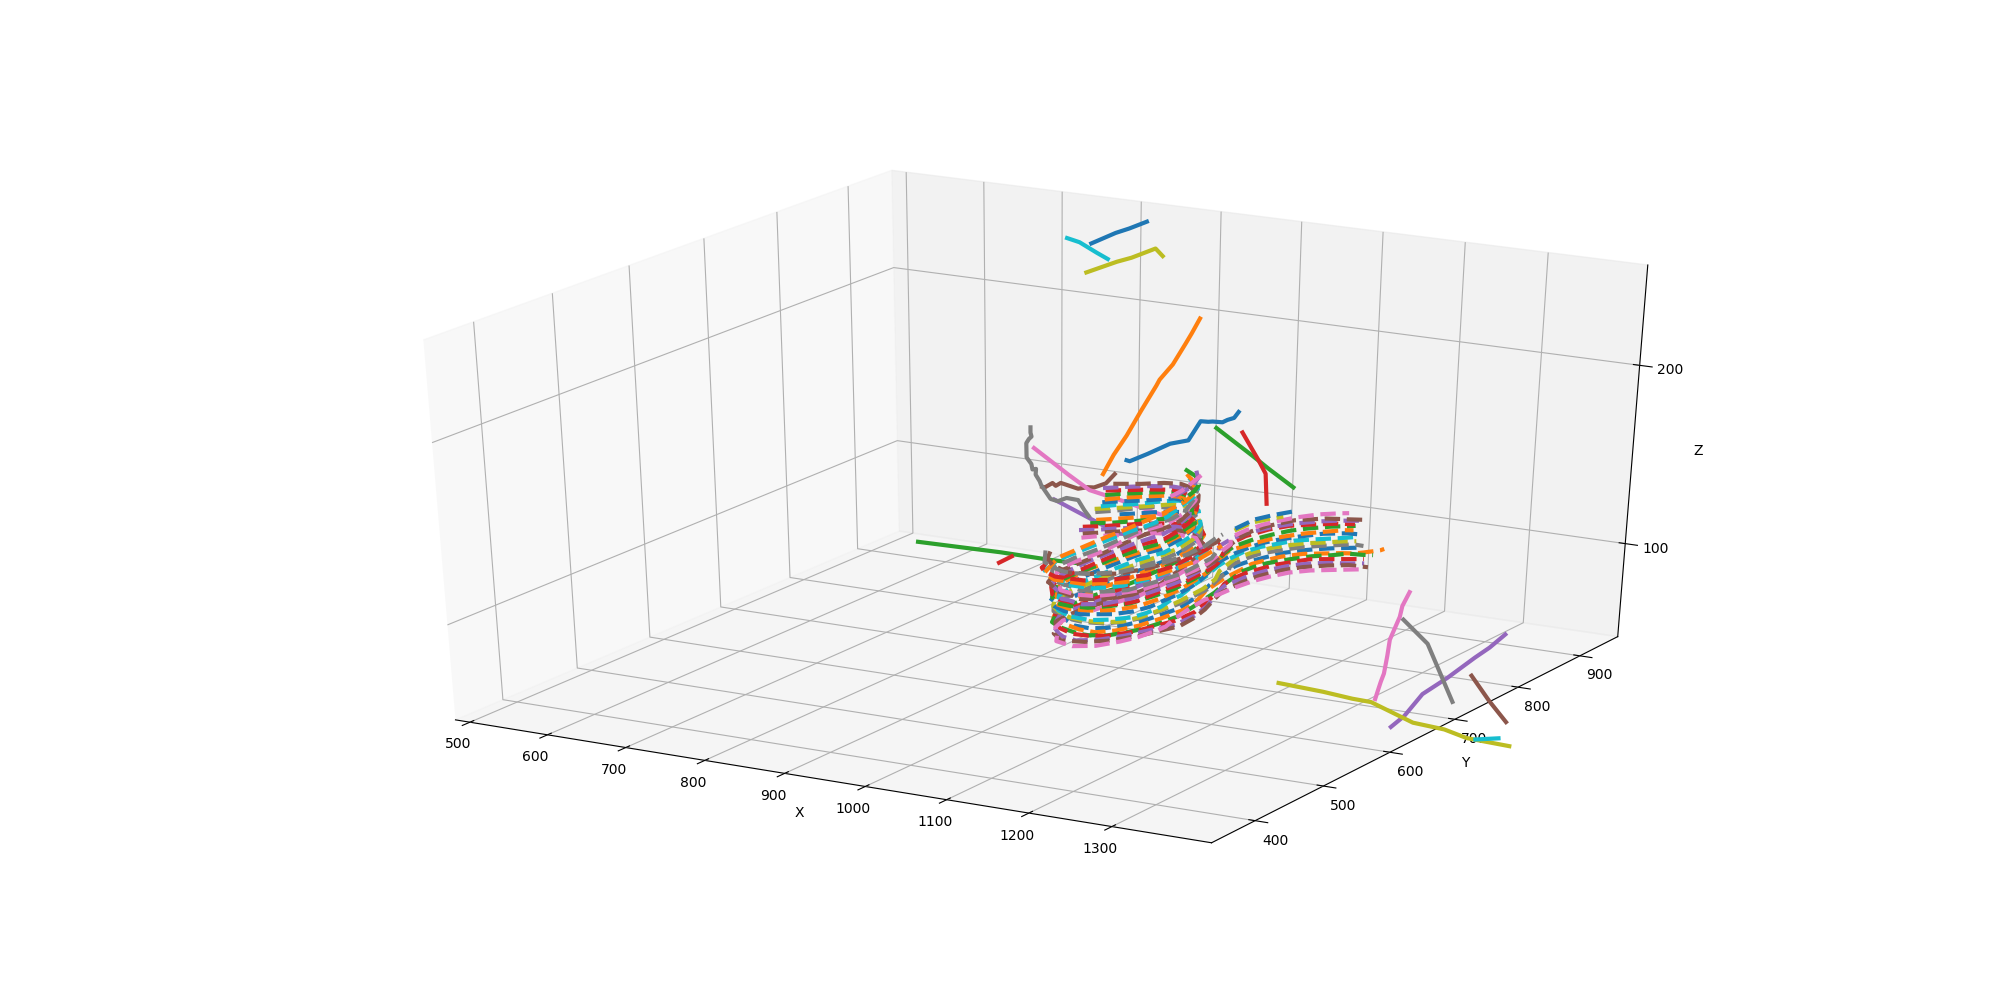

Text(0.5, 0, 'Z')

In [7]:
# plot actin and membrane

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=[20,10])
ax=fig.add_subplot(111, projection='3d')

coords = actin2
# all_membranes = membrane.reset_index()
# CCP = all_membranes[all_membranes['object']==1]

for filament in coords.index.unique():
    cur_filament = coords[coords.index==filament]
    ax.plot(xs=cur_filament['X'], ys=cur_filament['Y'], zs=cur_filament['Z'], linewidth=3)

for contourr in CCP['contour'].unique():
    cur_contour = CCP[CCP['contour']==contourr]
    ax.plot(xs=cur_contour['X'], ys=cur_contour['Y'], zs=cur_contour['Z'], linewidth=3, linestyle='dashed')

    
# plot membrane
# pit = membranes[membranes['contour']==1]
# ax.plot(xs = pit['X'], ys=pit['Y'], zs = pit['Z'], linewidth=5)
# ax.autoscale(enable=True,tight=True) 

plt.xlim([500,1400])
plt.ylim([350,950])
ax.set_zlim([50,250])

ax.set_xticks(np.arange(500,1400,100))
ax.set_yticks(np.arange(400,1000,100))
ax.set_zticks([100,200])


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# calculate directionality of filaments
## ydir is arcsin(y-y0)/length

In [17]:
ydirs=[]
zdirs=[]
all_filaments = []
filament_lengths = []
for filament in coords.index.unique():
    cur_filament = coords[coords.index==filament]
    xx = cur_filament.X
    yy = cur_filament.Y
    zz = cur_filament.Z

    deltaxx = sum(np.diff(xx))
    deltayy = sum(np.diff(yy))
    deltazz = sum(np.diff(zz))

#     np.dot(zz.iloc[-1],zz.iloc[0])
    fil_length = np.sqrt(deltaxx*deltaxx+deltayy*deltayy+deltazz+deltazz)

#     define direction theta such that 1 is up , 0 is parallel and -1 is down.
# arcsin(z/L)
#   take inverse so that + faces membrane (which is toward zero I think)
#     ydir = (deltayy/fil_length)
    ydir = np.degrees(np.arcsin(deltayy/fil_length))
   
    ydirs.append(ydir)
    
    zdir = np.degrees(-(np.arcsin(deltazz/fil_length)))
#     zdir = -np.arcsin(deltazz/fil_length)

    zdirs.append(zdir)
    
    filament_lengths.append(fil_length)
    
    cur_filament['ydir']=ydir
    cur_filament['zdir']=zdir
    cur_filament['length']=fil_length
    all_filaments.append(cur_filament)
    
all_filaments_df = pd.concat(all_filaments)
all_filaments_df

/Users/makamats/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/makamats/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/makamats/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,X,Y,Z,ydir,zdir,length
fil,,,,,,
1,1239,581,224,30.403742,12.804269,302.317714
1,1220,598,217,30.403742,12.804269,302.317714
1,1191,624,210,30.403742,12.804269,302.317714
1,1172,640,205,30.403742,12.804269,302.317714
1,1138,667,199,30.403742,12.804269,302.317714
...,...,...,...,...,...,...
20,1667,390,112,13.561054,6.983468,230.295462
20,1680,393,111,13.561054,6.983468,230.295462
20,1706,403,108,13.561054,6.983468,230.295462


In [10]:
# plot lengths sanity check
print(np.mean(filament_lengths))
plt.hist(filament_lengths)
# plt.show()

135.77328487472997


(array([5., 6., 1., 2., 3., 0., 2., 0., 0., 1.]),
 array([  0.        ,  46.08351115,  92.1670223 , 138.25053345,
        184.3340446 , 230.41755575, 276.50106691, 322.58457806,
        368.66808921, 414.75160036, 460.83511151]),
 <a list of 10 Patch objects>)

In [18]:
# plot distributions of angles

ydirs

[30.40374197138668,
 nan,
 70.61824524576863,
 81.25383773744478,
 50.22099074692948,
 35.37142631332533,
 29.932830694516927,
 -42.44341693475175,
 81.43148581225283,
 20.54515287332902,
 86.7186542822339,
 85.153727491104,
 -49.242476438614005,
 23.989655448327557,
 24.765712841887805,
 nan,
 45.66027629855318,
 58.69126104915882,
 13.561054436493436,
 nan]

In [20]:
# hsv 75% colormap
# https://stackoverflow.com/questions/18926031/how-to-extract-a-subset-of-a-colormap-as-a-new-colormap-in-matplotlib
import matplotlib.colors as colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = plt.get_cmap('hsv')
new_cmap = truncate_colormap(cmap, 0, 0.75)

In [19]:
# choose a colormap

import matplotlib.colors as colors
import matplotlib.cm as cmx

# colorss = cm = plt.get_cmap('BrBG') 
colorss = cm = plt.get_cmap('seismic') 

# colorss = cm = plt.get_cmap(new_cmap)
 
# cNorm  = colors.Normalize(vmin=0, vmax=values[-1])

# set colorlim to [-1 to 1]

cNorm  = colors.Normalize(vmin=-90, vmax=90)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=colorss)
print(scalarMap.get_clim())


(-90.0, 90.0)


<IPython.core.display.Javascript object>


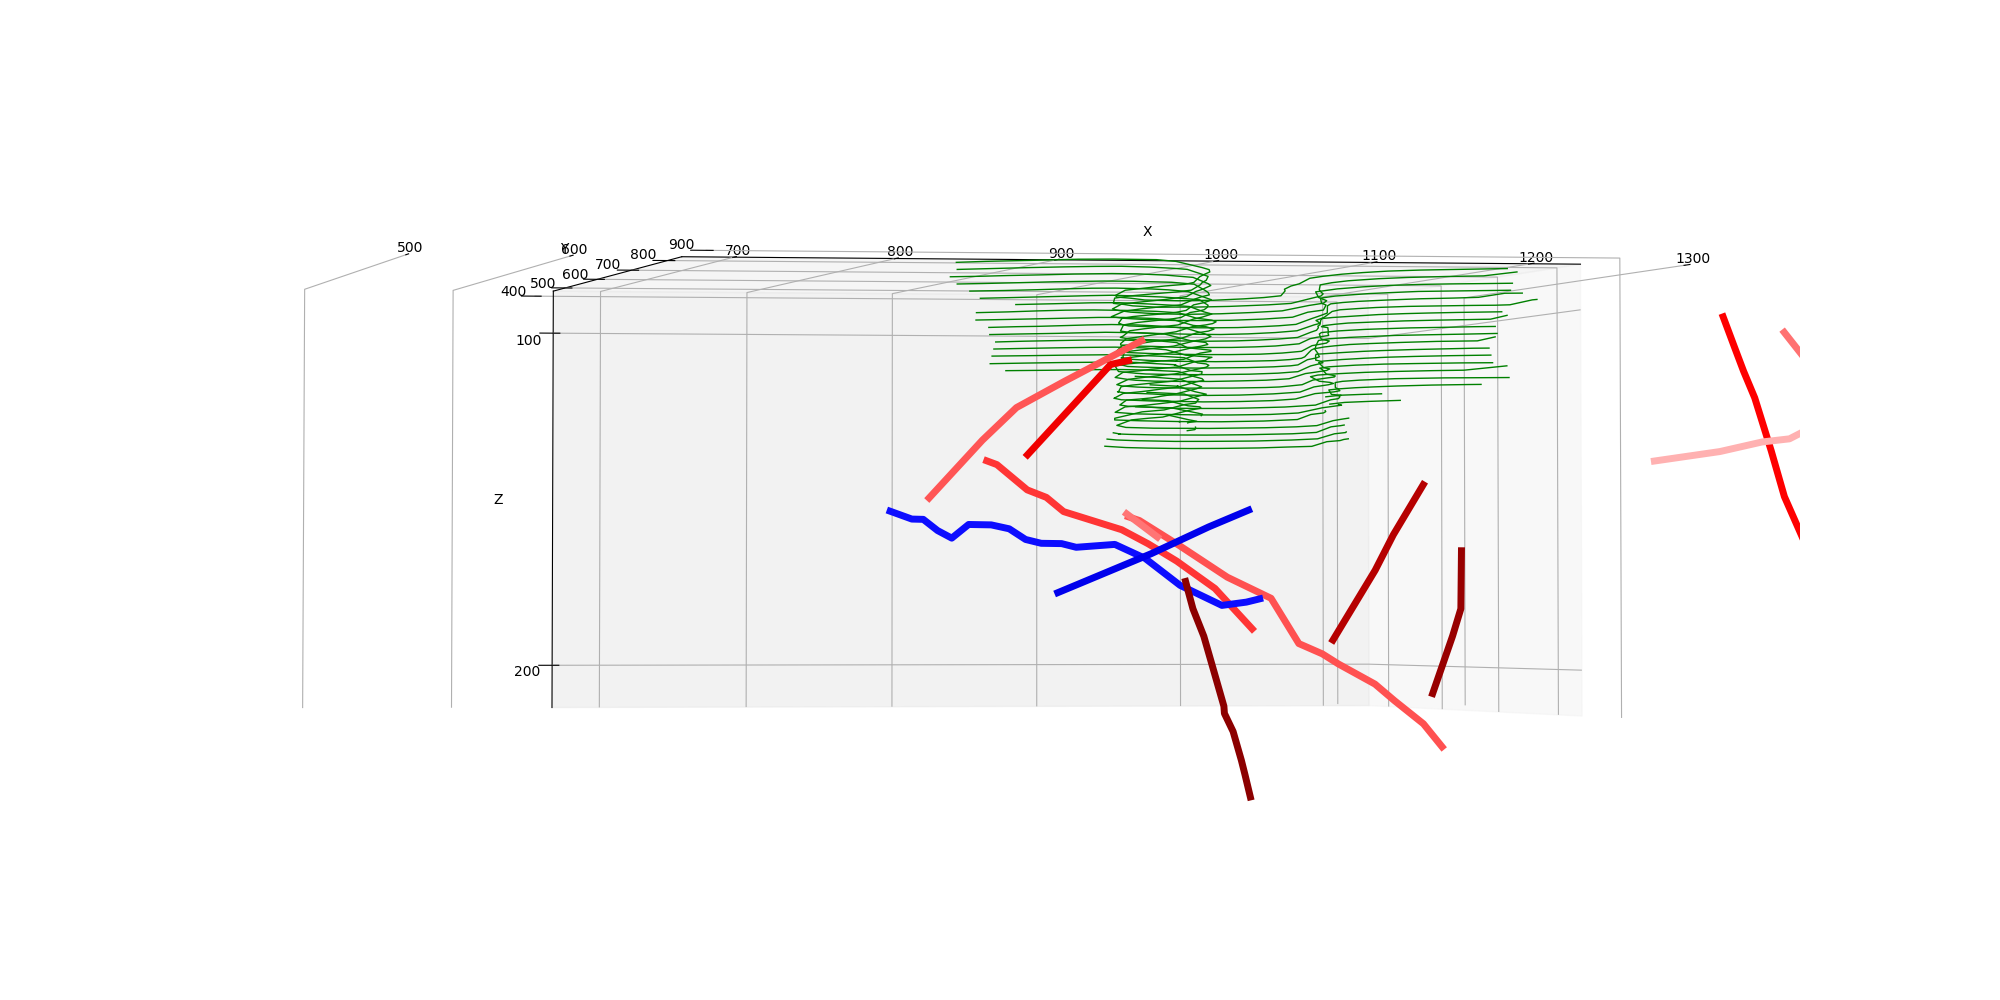

Text(0.5, 0, 'Z')

In [20]:
# color code angles

from matplotlib import cm

# plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=[20,10])
ax=fig.add_subplot(111, projection='3d')


# membrane

for contourr in CCP['contour'].unique():
    cur_contour = CCP[CCP['contour']==contourr]
    ax.plot(xs=cur_contour['X'], ys=cur_contour['Y'], zs=cur_contour['Z'], color='g', linewidth=1)

for filament in all_filaments_df.index.unique():
    cur_filament = all_filaments_df[all_filaments_df.index==filament]
    colorVal = scalarMap.to_rgba(cur_filament['ydir'])
    ax.plot(xs=cur_filament['X'], ys=cur_filament['Y'], zs=cur_filament['Z'], color=colorVal[0], linewidth=5)
    
plt.xlim([500,1400])
plt.ylim([350,950])
ax.set_zlim([50,250])

ax.set_xticks(np.arange(500,1400,100))
ax.set_yticks(np.arange(400,1000,100))
ax.set_zticks([100,200])


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [131]:
# save CCP membrane coordinates
CCP=CCP.reset_index().set_index(['object','contour'])

CCP.to_pickle('CCP_membrane_coordinates.pkl')
CCP

X    Y    Z
object contour                
1      1         871  851  100
       1         891  863  100
       1         910  876  100
       1         926  880  100
       1         947  869  100
...              ...  ...  ...
       28       1146  594  135
       28       1146  623  134
       28       1146  648  134
       28       1140  672  134
       28       1138  686  134

[822 rows x 3 columns]

In [160]:
# arrowheads??
# https://stackoverflow.com/questions/22867620/putting-arrowheads-on-vectors-in-matplotlibs-3d-plot
import numpy as np
from numpy import *
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)


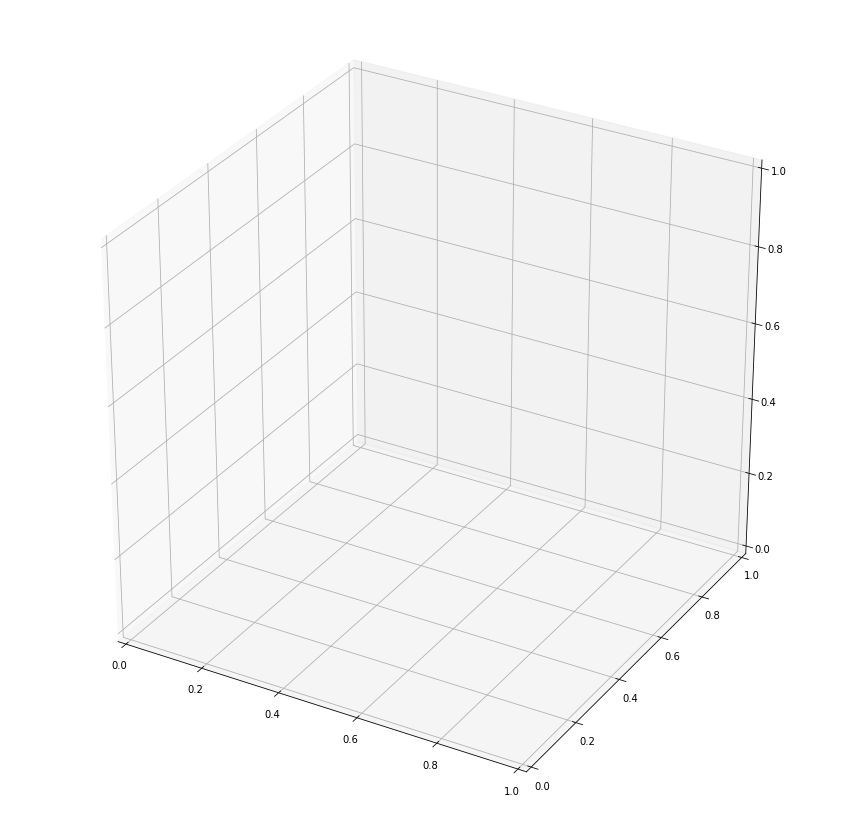

In [167]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

a = Arrow3D(xs=cur_filament['X'], ys=cur_filament['Y'], zs=cur_filament['Z'], mutation_scale=20, 
                lw=3, arrowstyle="-|>", color="r")
ax.add_artist(a)


## color code each segment